<a href="https://colab.research.google.com/github/6GETO9/6GETO9/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%BE%D0%B7%D1%80%D0%B0%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.datasets import mnist # Набор данных mnist
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Работа с изображениями
from google.colab import files # Импорт файлов
from random import randint
from keras.datasets import cifar10
# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [50]:
# Загружаем набор данных (датасет) MNIST
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [51]:
print("Размер обучающей выборки")
print(x_train.shape)
print()

print("Размер тестовой выборки")
print(x_test.shape)

Размер обучающей выборки
(50000, 32, 32, 3)

Размер тестовой выборки
(10000, 32, 32, 3)


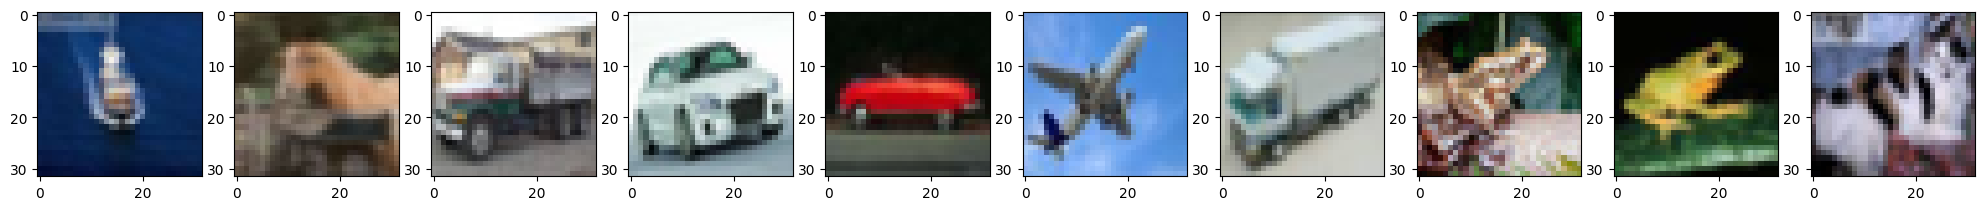


Labels:  1 4 3 9 5 0 4 7 3 1 


In [52]:
# Выводим для примера картинки из x_train и результатя ответов из y_train

# Создаем полотно из 10 графиков
fig, axs = plt.subplots(1, 10, figsize=(25, 3))

y = ''
for i in range(10): # Будем выводить 10 элементов
  index = randint(0, 49999)
  img = x_train[index] # Выбираем из x_train случайное изображение
  y += str(y_train_original[index]) + " " # Записываем метку изображения
  axs[i].imshow(Image.fromarray(img), cmap='gray') # Добавляем изображение в коллекцию

plt.show() #Показываем изображения

print("\nLabels: ", y)

In [59]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[55477], "->", y_train[49999])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[9999])
print(y_train_original[3768], "->", y_train[3768])


Обучающая выборка:
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
6 -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Тестовая выборка:
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
4 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [61]:
# Преобразуем нашу картинку в последовательность цифр (выравнивание)

print("До выравнивания")
print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)
print()

x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

print("После выравнивания")
print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)

До выравнивания
Размерность x_train:  (50000, 32, 32, 3)
Размерность x_test:  (10000, 32, 32, 3)

После выравнивания
Размерность x_train:  (50000, 3072)
Размерность x_test:  (10000, 3072)


In [62]:
# Нормализация картинок:

print("Изначальные значения:")
print(x_train[10][120:135])
print()

x_train = x_train / 255
x_test = x_test / 255

print("Значения после нормализации:")
print(x_train[10][120:135])

Изначальные значения:
[0.25490196 0.28627451 0.23137255 0.29019608 0.31764706 0.25882353
 0.30196078 0.31764706 0.2627451  0.3254902  0.3254902  0.27843137
 0.3254902  0.31764706 0.25490196]

Значения после нормализации:
[0.00099962 0.00112265 0.00090734 0.00113802 0.00124567 0.00101499
 0.00118416 0.00124567 0.00103037 0.00127643 0.00127643 0.00109189
 0.00127643 0.00124567 0.00099962]


In [63]:
# Задаём batch_size
batch_size = 128

# Создаем последовательную модель нейронной сети
model = Sequential()
# Выравнивающий слой
model.add(Dense(784, input_dim=784, activation='relu'))
# Полносвязный скрытый слой
model.add(Dense(128, activation='relu'))
# Слой классификации
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
import numpy as np
from PIL import Image
import io
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Загрузка и подготовка данных CIFAR-10
print("Загрузка данных CIFAR-10...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Названия классов CIFAR-10
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# Создание простой CNN модели
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Создаем и обучаем модель
print("Создание и обучение модели...")
model = create_model()

# Быстрое обучение на небольшом количестве эпох для демонстрации
history = model.fit(x_train, y_train,
                   epochs=15,
                   batch_size=64,
                   validation_data=(x_test, y_test),
                   verbose=1)

Загрузка данных CIFAR-10...
Создание и обучение модели...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 58ms/step - accuracy: 0.3191 - loss: 1.8385 - val_accuracy: 0.5239 - val_loss: 1.3298
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5382 - loss: 1.2895 - val_accuracy: 0.5900 - val_loss: 1.1445
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.6100 - loss: 1.1102 - val_accuracy: 0.6342 - val_loss: 1.0394
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.6573 - loss: 0.9866 - val_accuracy: 0.6551 - val_loss: 0.9780
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.6857 - loss: 0.8982 - val_accuracy: 0.6848 - val_loss: 0.9036
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.7120 - loss: 0.8251 - val_accuracy: 0.6869 - val_loss: 0.9040
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.7277 - loss: 0.7861 - val_accuracy: 0.6774 - val_loss: 0.9281
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.7424 - loss: 0.7407 - 

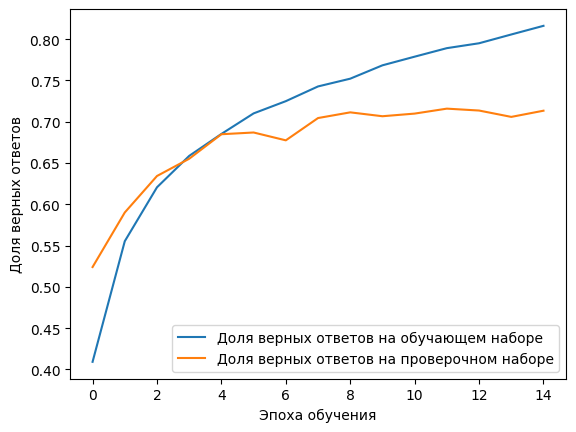

In [67]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


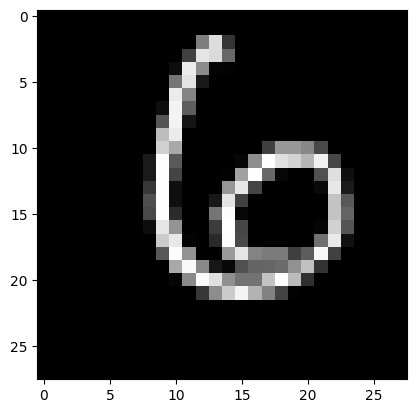

Выход сети:
[2.2272930e-05 2.3959954e-06 5.7302022e-06 2.3397477e-09 1.3206441e-06
 1.6686610e-06 9.9995571e-01 2.2990773e-07 1.0598368e-05 1.0845639e-08]

0 -> 0.0000222729304368840530514717102050781250
1 -> 0.0000023959953523444710299372673034667969
2 -> 0.0000057302022469229996204376220703125000
3 -> 0.0000000023397477288966683772741816937923
4 -> 0.0000013206440598878543823957443237304688
5 -> 0.0000016686609569660504348576068878173828
6 -> 0.9999557137489318847656250000000000000000
7 -> 0.0000002299077266343374503776431083679199
8 -> 0.0000105983681351062841713428497314453125
9 -> 0.0000000108456390535138780251145362854004

Распознанная цифра:  6
Верный ответ:  6


In [20]:
# Подаем в нейросеть все картинки из тестовой выборки
prediction = model.predict(x_test)

# Выбираем номер для примера
n = 100 #2024

# Покажем картинку
img = x_test[n]
img = img*255
img = img.reshape(28, 28)
img = img.astype('uint8')
plt.imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков
plt.show()

print("Выход сети:")
print(prediction[n])
print()
for i in range(10):
  print(i,"->","{:.40f}".format(prediction[n][i]))
print()
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))